<a href="https://colab.research.google.com/github/Tut-Gatwech/Data-Preprocessing-for-ML-using-Titanic-Dataset/blob/main/Machine_Learning_Classification_Project_PlayTennis_Dataset_with_Entropy_and_Log_Loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries for data handling, visualization, and machine learning
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, log_loss, ConfusionMatrixDisplay



In [ ]:
#step 1: load data from csv file
url= "https://gist.githubusercontent.com/DiogoRibeiro7/c6590d0cf119e87c39e31c21a9c0f3a8/raw/4a8e3da267a0c1f0d650901d8295a5153bde8b21/PlayTennis.csv"
df = pd.read_csv(url)


df = pd.read_csv(url)


In [ ]:
# Step 2: Display dataset info (columns, data types, missing values)
print("Dataset Info:")
print(df.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Wind         14 non-null     object
 4   Play Tennis  14 non-null     object
dtypes: object(5)
memory usage: 692.0+ bytes
None


In [ ]:
# show the distribution of target variable(PlayTennis)
print("\nClass Distribution:")
print(df['Play Tennis'].value_counts())




Class Distribution:
Play Tennis
Yes    9
No     5
Name: count, dtype: int64


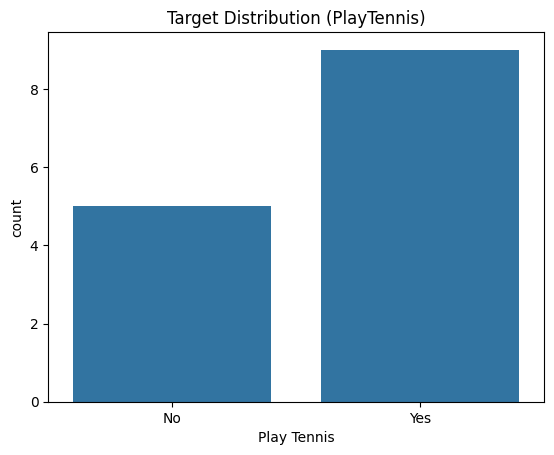

In [ ]:
# Step 4: Plot target distribution
sns.countplot(x='Play Tennis', data=df)
plt.title("Target Distribution (PlayTennis)")
plt.show()




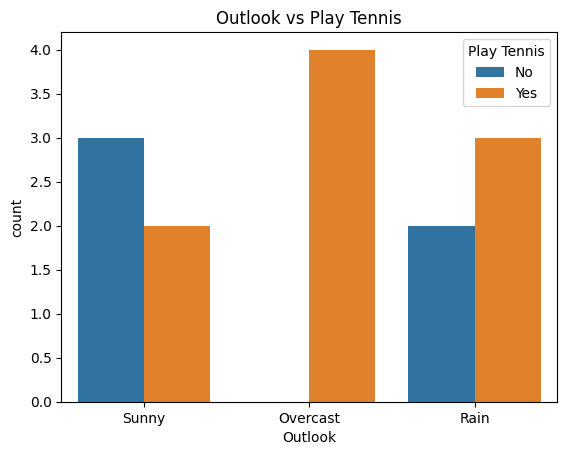

In [ ]:
# Step 5: Plot relationship between Outlook and PlayTennis
sns.countplot(x='Outlook', hue='Play Tennis', data=df)
plt.title("Outlook vs Play Tennis")
plt.show()



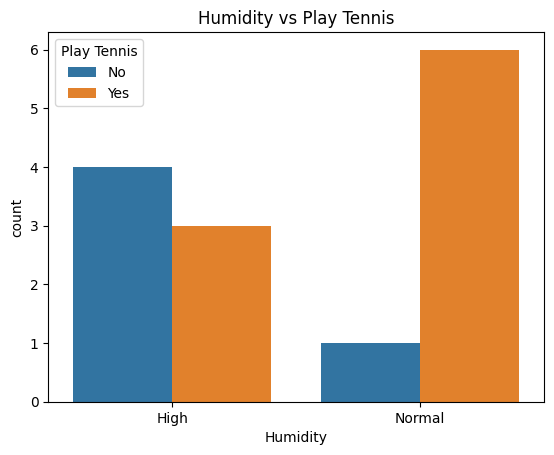

In [ ]:
# Step 6: Plot relationship between Humidity and PlayTennis
sns.countplot(x='Humidity', hue='Play Tennis', data=df)
plt.title("Humidity vs Play Tennis")
plt.show()



In [ ]:
# Step 7: Encode categorical features into numeric values using LabelEncoder
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])



In [ ]:
# Step 8: Separate features (X) and target (y)
X = df.drop('Play Tennis', axis=1)
y = df['Play Tennis']



In [ ]:
# Step 9: Split dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [ ]:
# Step 10: Initialize Decision Tree classifier with entropy criterion
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)




In [ ]:
# Step 11: Train the Decision Tree model on training data
clf.fit(X_train, y_train)



DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

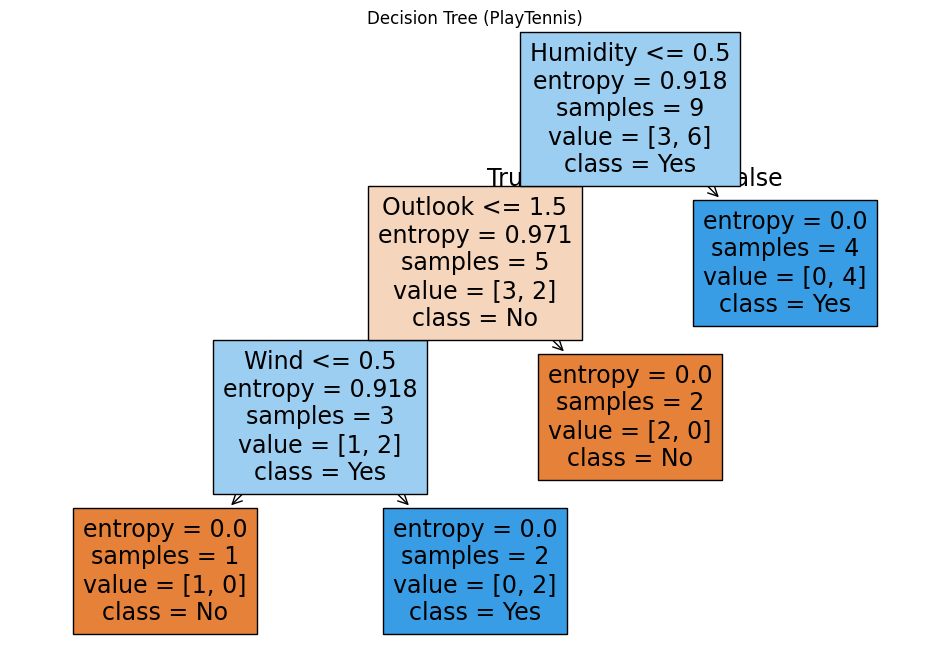

In [ ]:
# Step 12: Visualize the trained Decision Tree structure
plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=X.columns, class_names=['No','Yes'], filled=True)
plt.title("Decision Tree (PlayTennis)")
plt.show()



In [ ]:
# Step 13: Predict target values on test set
y_pred = clf.predict(X_test)



In [ ]:
# Step 14: Predict probability values on test set (needed for log loss)
y_prob = clf.predict_proba(X_test)



In [ ]:
# Step 15: Calculate and print accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))




Accuracy: 0.6


In [ ]:
# Step 16: Calculate and print log loss score
print("Log Loss:", log_loss(y_test, y_prob))



Log Loss: 14.41746135564686


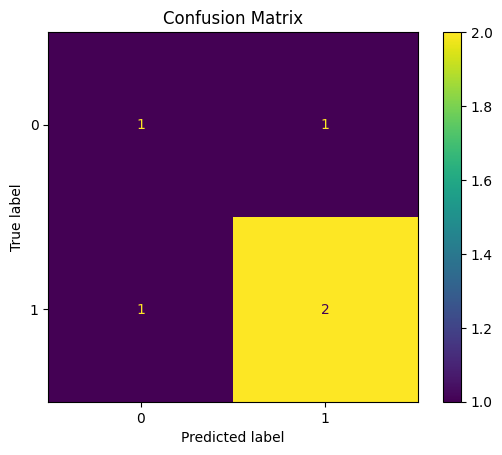

In [ ]:
# Step 17: Display confusion matrix for classification results
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()



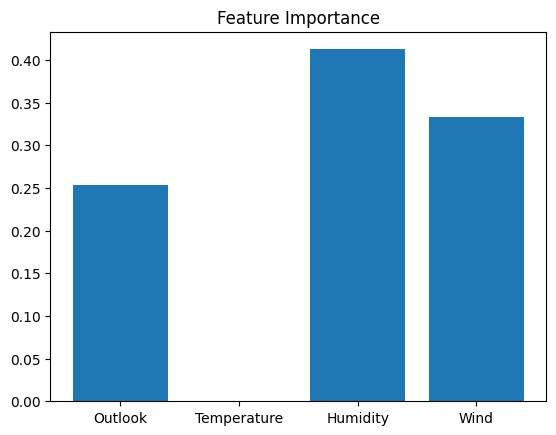

In [ ]:
# Step 18: Plot feature importance to see which attributes influence decisions most
plt.bar(X.columns, clf.feature_importances_)
plt.title("Feature Importance")
plt.show()




## 📖 General Interpretation

- **EDA Findings**: The dataset shows how weather conditions (Outlook, Temperature, Humidity, Wind) affect the decision to play tennis. For example, *Overcast* strongly correlates with "Yes".
- **Preprocessing**: Categorical values were converted into numbers using Label Encoding so the Decision Tree could process them.
- **Decision Tree**: The model splits data using **entropy**, reducing uncertainty at each step. Outlook is often the first split because it strongly influences the decision.
- **Evaluation**:
  - ✅ Accuracy shows how many predictions were correct.
  - 📉 Log Loss measures how well probability predictions match actual outcomes.
  - 🔲 Confusion Matrix visualizes correct vs incorrect classifications.
  - 📊 Feature Importance highlights which weather attributes matter most (Outlook and Humidity).
- So The Decision Tree successfully models the decision-making process for playing tennis, demonstrating how entropy-based classification works on categorical datasets.





